# Life Expectancy (WHO)

Statistical Analysis on Factors Influencing Life Expectancy and Comparing Various Regression Models.

![WHO](https://github.com/DiwakerRathore/Life-Expectancy-WHO/blob/main/logo-who.jpg?raw=true "Title")
# Life Expectancy WHO
Statistical Analysis on Factors Influencing Life Expectancy and Comparing Various Regression Models.

## Team Members:
*	[Arka Misra](https://www.linkedin.com/in/arka-misra/)
*	[Diwaker Rathore](https://www.linkedin.com/in/diwaker-rathore/)

## [Data Description:](https://github.com/DiwakerRathore/Life-Expectancy-WHO/raw/main/Data%20Description.xlsx)

This dataset tracks many features of a nation for a period of 15 years, from 2000 – 2015 to determine which factors play the most responsible role for deciding the life expectancy of its citizens. This will help many developing nations to take steps which will allow them to tackle the most important factors that are responsible for low life expectancy. This project is trying to determine an efficient way of improving the life expectancy of many developing nations.

## Inspiration:
In this problem we're aiming to answer the following key questions:
* Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
* Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
* How does Infant and Adult mortality rates affect life expectancy?
* What is the impact of schooling on the lifespan of humans?
* Does Life Expectancy have positive or negative relationship with drinking alcohol?
* Do densely populated countries tend to have lower life expectancy?
* What is the impact of Immunization coverage on life Expectancy?





##### Life Expectancy- Our World in data    
                                                      
•	To explore life expectancy around the world and to identify the determinants that has a significant influence on the same. <br>
•	The project is based on the regression method. <br>
•	Collecting data from multiple sources, cleaning, pre-processing, and performing regression analysis using various Python libraries and Tableau.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import dtale
import missingno as msno

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import category_encoders as ce

In [2]:
df = pd.read_csv('Final WHO Dataset.csv')

###### Renaming Variables & Data Description:

* life_expectancy:_____Life expectancy at birth (in years)
* life_expect60:_____life expectancy after 60 (in years)
* adult_mortality:_____Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* infant_mortality:_____Infant mortality rate (Death rate up to age 1) 
* 1-4_mortality:_____Age 1-4 mortality rate (Death rate, age 1-4) 
* alcohol:_____Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) 
* hep_b:_____Hepatitis B (HepB) immunization coverage among 1-year-olds (%) 
* measles:_____Measles - number of reported cases per 1000 population 
* bmi:_____Average BMI of entire population
* polio:_____Polio (Pol3) immunization coverage among 1-year-olds (%) 
* health_gov_expendt%:_____General government expenditure on health as a percentage of total government expenditure (%)
* dtp3:_____Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* hiv_aids: _____Deaths per 1 000 live births HIV/AIDS (0-4 years) 
* gdp:_____GDP per capita (in USD) 
* population:_____Population Total 
* 5_19thinness:_____age5-19thinness 
* 5_19obesity:_____age5-19obesity 
* hdi:_____Human Development Index in terms of income composition of resources
* schooling:_____Schooling, Number of years 
* drinking_water:_____Population using at least basic drinking-water services 
* national_income_capita:_____Gross national income per capita (PPP int. $) 
* health_expenditure%_gdp:_____Current health expenditure (CHE) as percentage of gross domestic product (GDP)
* obesity_adults:_____Obesity among adults(%)

In [3]:
df.rename(columns={'Country': 'country', 'Region': 'region', 'Year': 'year', 'Status': 'status', 'Life expectancy at birth (in years)': 'life_expectancy', 'life expectancy after 60 (in years)': 'life_expect60', 'Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)': 'adult_mortality', 'Infant mortality rate (Death rate up to age 1)': 'infant_mortality', 'Age 1-4 mortality rate (Death rate, age 1-4)': '1-4_mortality', 'Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)': 'alcohol', 'Hepatitis B (HepB) immunization coverage among 1-year-olds (%)': 'hep_b', 'Measles - number of reported cases per 1000 population': 'measles', 'Average BMI of entire population': 'bmi', 'Polio (Pol3) immunization coverage among 1-year-olds (%)': 'polio', 'General government expenditure on health as a percentage of total government expenditure (%)': 'health_gov_expendt%', 'Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)': 'dtp3', 'Deaths per 1 000 live births HIV/AIDS (0-4 years)': 'hiv_aids', 'GDP per capita (in USD)': 'gdp', 'Population Total': 'population', 'age5-19thinness': '5_19thinness', 'age5-19obesity': '5_19obesity', 'Human Development Index in terms of income composition of resources ': 'hdi', 'Schooling, Number of years ': 'schooling', 'Population using at least basic drinking-water services': 'drinking_water', 'Gross national income per capita (PPP int. $)': 'national_income_capita', 'Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)': 'health_expenditure%_gdp', 'Obesity among adults(%)': 'obesity_adults'}, inplace=True)
df.head(16)

,country,region,year,status,life_expectancy,life_expect60,adult_mortality,infant_mortality,1-4_mortality,alcohol,...,gdp,population,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adults
0,Afghanistan,South Asia,2000,Developing,54.8,15.14620,316.0496,0.098245,0.011050,0.01,...,114.560000,20780000.0,20.6,0.6,0.338,5.5,27.77190,NaN,NaN,2.3 [1.3-3.7]
1,Afghanistan,South Asia,2001,Developing,55.3,15.20886,307.2416,0.095925,0.010625,0.01,...,117.496980,21607000.0,20.4,0.7,0.340,5.9,27.79726,NaN,NaN,2.4 [1.4-3.8]
2,Afghanistan,South Asia,2002,Developing,56.2,15.24703,292.3430,0.093330,0.010130,0.01,...,187.845950,22601000.0,20.2,0.8,0.341,6.2,29.90076,870.0,9.44339,2.6 [1.5-4.0]
3,Afghanistan,South Asia,2003,Developing,56.7,15.35566,286.4569,0.090470,0.009655,0.01,...,198.728544,23681000.0,20.0,0.9,0.373,6.5,32.00507,920.0,8.94126,2.7 [1.6-4.2]
4,Afghanistan,South Asia,2004,Developing,57.0,15.44257,281.8943,0.087595,0.009210,0.02,...,219.141353,24727000.0,19.8,1.0,0.381,6.8,34.12623,920.0,9.80847,2.9 [1.7-4.4]
5,Afghanistan,South Asia,2005,Developing,57.3,15.52284,277.1813,0.084630,0.008785,0.02,...,25.294130,25654000.0,19.6,1.1,0.396,7.9,36.26526,1020.0,9.94829,3.0 [1.9-4.6]
6,Afghanistan,South Asia,2006,Developing,57.3,15.61361,275.8199,0.081555,0.008320,0.03,...,272.563770,26433000.0,19.4,1.2,0.405,8.1,38.40636,1080.0,10.62277,3.2 [2.0-4.9]
7,Afghanistan,South Asia,2007,Developing,57.5,15.70337,272.5923,0.078620,0.007890,0.02,...,369.835796,27101000.0,19.2,1.3,0.415,8.4,40.84418,1230.0,9.90467,3.4 [2.1-5.1]
8,Afghanistan,South Asia,2008,Developing,58.1,15.80124,264.8989,0.075625,0.007500,0.03,...,373.361116,27722000.0,19.0,1.5,0.433,8.7,43.31506,1270.0,10.25650,3.6 [2.2-5.4]
9,Afghanistan,South Asia,2009,Developing,58.6,15.87475,259.8107,0.072655,0.007085,0.01,...,445.893298,28395000.0,18.9,1.6,0.434,8.9,45.81909,1510.0,9.81849,3.8 [2.4-5.6]


In [4]:
obesity_adlts = df['obesity_adults'].apply(lambda x: str(x).split(" [")[0])
df['obesity_adlts'] = obesity_adlts
df.drop(['obesity_adults'], axis=1, inplace=True)

In [5]:
df['obesity_adlts'] = pd.to_numeric(df['obesity_adlts'], errors='coerce')

In [6]:
df.dtypes

country                     object
region                      object
year                         int64
status                      object
life_expectancy            float64
life_expect60              float64
adult_mortality            float64
infant_mortality           float64
1-4_mortality              float64
alcohol                    float64
hep_b                      float64
measles                      int64
bmi                        float64
polio                      float64
health_gov_expendt%        float64
dtp3                       float64
hiv_aids                   float64
gdp                        float64
population                 float64
5_19thinness               float64
5_19obesity                float64
hdi                        float64
schooling                  float64
drinking_water             float64
national_income_capita     float64
health_expenditure%_gdp    float64
obesity_adlts              float64
dtype: object

### Checking for Faulty Data:

###### Ranges for every column for deciding Inexplicit Nulls on the basis of WHO Statistics 2015 official report:

* life_expectancy:_____ Life expectancy at birth (in years): _____ Range ~ (35, 87)
* adult_mortality:_____Adult Mortality Rates of both sexes(probability of dying between 15 and 60 years per 1000 population):_____ Range ~ (36, 634)
* infant_mortality:_____Infant mortality rate (Death rate up to age 1):_____ Range ~ (1.6, 165)
* 1-4_mortality:_____Age 1-4 mortality rate (Death rate, age 1-4):_____ Range ~ (2, 330) 
* hep_b:_____Hepatitis B (HepB) immunization coverage among 1-year-olds (%):_____ Range ~ (20, 99) 
* health_gov_expendt%:_____General government expenditure on health as a percentage of total government expenditure (%):_____ Range ~ (0.1, 28)
* dtp3:_____Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%):_____ Range ~ (3, 99) 

###### Note: Columns not here are checked previously, no faulty data

##### [Dtale Library](https://www.youtube.com/watch?v=xSXGcuiEzUc)

In [7]:
dtale.show(df)

2021-08-21 01:27:17,785 - INFO     - NumExpr defaulting to 4 threads.


In [8]:
df = df.drop(['measles', 'life_expect60','population'], axis = 1)

In [9]:
df.head()

,country,region,year,status,life_expectancy,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,...,hiv_aids,gdp,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adlts
0,Afghanistan,South Asia,2000,Developing,54.8,316.0496,0.098245,0.011050,0.01,62.0,...,0.1,114.560000,20.6,0.6,0.338,5.5,27.77190,NaN,NaN,2.3
1,Afghanistan,South Asia,2001,Developing,55.3,307.2416,0.095925,0.010625,0.01,63.0,...,0.1,117.496980,20.4,0.7,0.340,5.9,27.79726,NaN,NaN,2.4
2,Afghanistan,South Asia,2002,Developing,56.2,292.3430,0.093330,0.010130,0.01,64.0,...,0.1,187.845950,20.2,0.8,0.341,6.2,29.90076,870.0,9.44339,2.6
3,Afghanistan,South Asia,2003,Developing,56.7,286.4569,0.090470,0.009655,0.01,65.0,...,0.1,198.728544,20.0,0.9,0.373,6.5,32.00507,920.0,8.94126,2.7
4,Afghanistan,South Asia,2004,Developing,57.0,281.8943,0.087595,0.009210,0.02,67.0,...,0.1,219.141353,19.8,1.0,0.381,6.8,34.12623,920.0,9.80847,2.9


In [10]:
sns.distplot(df['population'], hist = True, bins = 5)

KeyError: 'population'

In [ ]:
df

In [ ]:
s = df['1-4_mortality']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])


In [ ]:
df_num.infant_mortality

In [ ]:
def outlier(col):   
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr
#   outliers = dict(col[(col < iqr_lower) | (col > iqr_upper)])
    return outliers

In [ ]:
dict1 = outlier(df_num['infant_mortality'])

In [ ]:
data = pd.Series(dict1)
data

In [ ]:
def print_quantile_info(qu_dataset, qu_field):
    a = qu_dataset[qu_field].describe()
    
    iqr = a["75%"] - a["25%"]
    print("interquartile range:", iqr)
    
    upper_inner_fence = a["75%"] + 1.5 * iqr
    lower_inner_fence = a["25%"] - 1.5 * iqr
    print("upper_inner_fence:", upper_inner_fence)
    print("lower_inner_fence:", lower_inner_fence)
    
    upper_outer_fence = a["75%"] + 3 * iqr
    lower_outer_fence = a["25%"] - 3 * iqr
    print("upper_outer_fence:", upper_outer_fence)
    print("lower_outer_fence:", lower_outer_fence)
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of inner fences: %.2f"% (percentage))
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_outer_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of outer fences: %.2f"% (percentage))

In [ ]:
print_quantile_info(df_num, "infant_mortality")

In [ ]:
def remove_outliers_using_quantiles(qu_dataset, qu_field, qu_fence):
    a = qu_dataset[qu_field].describe()
    
    iqr = a["75%"] - a["25%"]
    print("interquartile range:", iqr)
    
    upper_inner_fence = a["75%"] + 1.5 * iqr
    lower_inner_fence = a["25%"] - 1.5 * iqr
    print("upper_inner_fence:", upper_inner_fence)
    print("lower_inner_fence:", lower_inner_fence)
    
    upper_outer_fence = a["75%"] + 3 * iqr
    lower_outer_fence = a["25%"] - 3 * iqr
    print("upper_outer_fence:", upper_outer_fence)
    print("lower_outer_fence:", lower_outer_fence)
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of inner fences: %.2f"% (percentage))
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_outer_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of outer fences: %.2f"% (percentage))
    
    if qu_fence == "inner":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_inner_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_inner_fence]
    elif qu_fence == "outer":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_outer_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_outer_fence]
    else:
        output_dataset = qu_dataset
    
    print("length of input dataframe:", len(qu_dataset))
    print("length of new dataframe after outlier removal:", len(output_dataset))
    
    return output_dataset

In [ ]:
new_dataset = remove_outliers_using_quantiles(df_num, "infant_mortality", "inner")

In [ ]:
print_quantile_info(df_num, "infant_mortality")

In [ ]:
new_dataset = remove_outliers_using_quantiles(df_num, "infant_mortality", "inner")

In [ ]:
columns = list(df.columns)

### Checking for Missing Data

In [11]:
print("Total null values excluding inexplicit nulls")
col_na = df.columns[df.isnull().any()]
df_na_cnt = df[col_na].isnull().sum()
df_na = (df[col_na].isnull().sum()/len(df)) * 100
df_na = pd.DataFrame({'Total Null Val': df_na_cnt, 'Null Value %': df_na})
df_na = df_na.sort_values(by='Null Value %', ascending=False)
df_na

Total null values excluding inexplicit nulls


,Total Null Val,Null Value %
hep_b,553,18.822328
national_income_capita,541,18.413887
gdp,448,15.248468
health_gov_expendt%,226,7.692308
alcohol,194,6.603131
hdi,167,5.684139
schooling,163,5.547992
health_expenditure%_gdp,155,5.275698
bmi,78,2.654867
drinking_water,78,2.654867


In [12]:
# corrmat = df.corr()
# f, ax = plt.subplots(figsize=(15, 15))
# sns.heatmap(corrmat, annot=True, vmax=.8, square=True);

Removing 10 data points for which life expectancy data is not available

In [13]:
life_expectancy_null_data = df.loc[df['life_expectancy'].isnull()]
life_expectancy_null_data

,country,region,year,status,life_expectancy,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,...,hiv_aids,gdp,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adlts
624,Cook Islands,NaN,2013,Developing,NaN,NaN,NaN,NaN,0.01,98.0,...,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.9
769,Dominica,Middle East & North Africa,2013,Developing,NaN,NaN,NaN,NaN,0.01,96.0,...,0.1,722.756650,NaN,NaN,0.721,12.7,NaN,NaN,NaN,19.4
1650,Marshall Islands,East Asia & Pacific,2013,Developing,NaN,NaN,NaN,NaN,0.01,8.0,...,0.1,3617.752354,NaN,NaN,NaN,0.0,NaN,NaN,NaN,43.7
1715,Monaco,Europe & Central Asia,2013,Developing,NaN,NaN,NaN,NaN,0.01,99.0,...,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,East Asia & Pacific,2013,Developing,NaN,NaN,NaN,NaN,0.01,87.0,...,0.1,136.183210,NaN,NaN,NaN,9.6,NaN,NaN,NaN,55.1
1909,Niue,NaN,2013,Developing,NaN,NaN,NaN,NaN,0.01,99.0,...,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5
1958,Palau,East Asia & Pacific,2013,Developing,NaN,NaN,NaN,NaN,NaN,99.0,...,0.1,1932.122370,NaN,NaN,0.779,14.2,NaN,NaN,NaN,45.0
2167,Saint Kitts and Nevis,Latin America & Caribbean,2013,Developing,NaN,NaN,NaN,NaN,8.54,97.0,...,0.1,NaN,NaN,NaN,0.749,13.4,NaN,NaN,NaN,14.4
2216,San Marino,Sub-Saharan Africa,2013,Developing,NaN,NaN,NaN,NaN,0.01,69.0,...,0.1,NaN,NaN,NaN,NaN,15.1,NaN,NaN,NaN,NaN
2713,Tuvalu,East Asia & Pacific,2013,Developing,NaN,NaN,NaN,NaN,0.01,9.0,...,0.1,3542.135890,NaN,NaN,NaN,0.0,NaN,NaN,NaN,39.3


We'll drop these rows because for all these countries data only for 2013 is available and not available for any other year. <br>
Drop rows with missing values in Life expectancy.

In [14]:
df = df.dropna( how='any', subset=['life_expectancy'])

In [15]:
df['life_expectancy'].isnull().sum().max()

0

In [16]:
life_ex = df[['life_expectancy']].copy()

<AxesSubplot:>

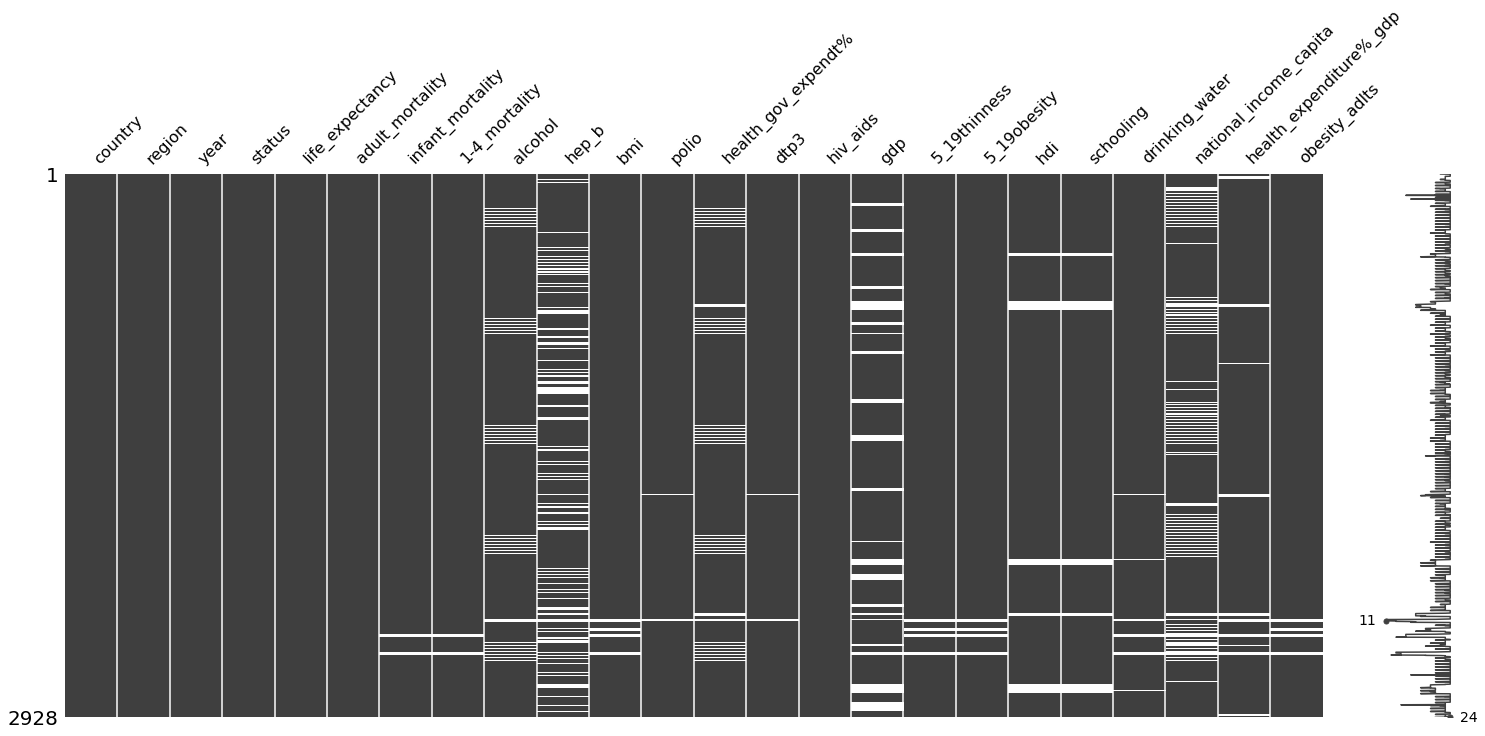

In [17]:
msno.matrix(df)

###### Missing values correlation heat-map

<AxesSubplot:>

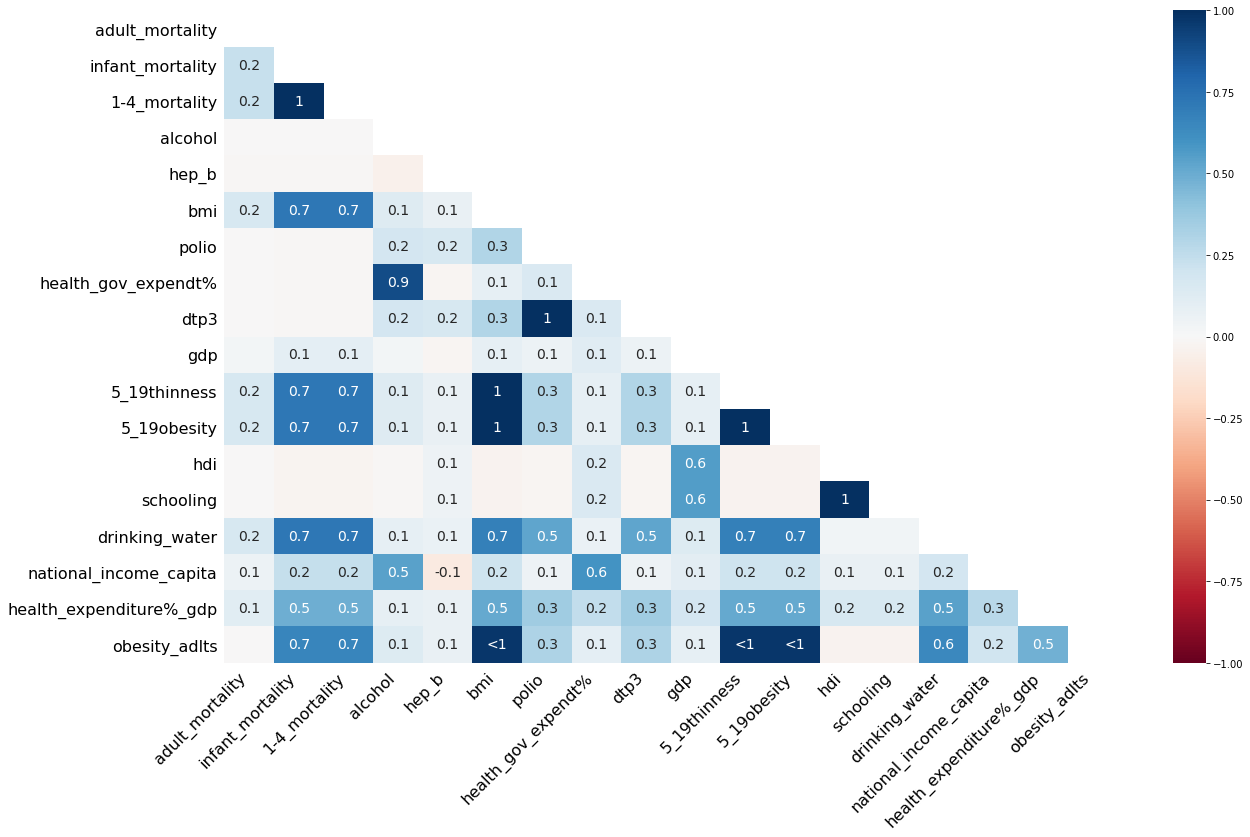

In [18]:
msno.heatmap(df)

###### Filling missing data
[Dealing with Missing Data](https://medium.com/@danberdov/dealing-with-missing-data-8b71cd819501)<br>
[Simple techniques for missing data imputation](https://www.kaggle.com/residentmario/simple-techniques-for-missing-data-imputation)<br>
[3 underrated strategies to deal with Missing Values](https://towardsdatascience.com/3-underrated-strategies-to-deal-with-missing-values-a539fb6c0690)<br>
[arioboo/mega-eda-train airquality notebook](https://www.kaggle.com/arioboo/mega-eda-train-airquality-dataset/notebook)<br>
[The problem of missing data](https://stefvanbuuren.name/fimd/sec-problem.html)<br>
[Mice Forest](https://pypi.org/project/miceforest/)<br>
[predicting-missing-values-with-python](https://towardsdatascience.com/predicting-missing-values-with-python-41e581511117)<br>
[how-to-use-python-and-missforest-algorithm-to-impute-missing-data](https://towardsdatascience.com/how-to-use-python-and-missforest-algorithm-to-impute-missing-data-ed45eb47cb9a)



We will be applying Regression and K-Nearest Neighbors techniques for filling the missing data.<br>
[Nearest neighbor imputation algorithms: a critical evaluation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4959387/)

##### Note:
Using the target variable as a predictor is not a good choice since we are leaking data for future models.

###### Encoding Categorical Variables

In [19]:
df['region'].value_counts()

Sub-Saharan Africa            769
Europe & Central Asia         767
Latin America & Caribbean     513
East Asia & Pacific           401
Middle East & North Africa    318
South Asia                    128
North America                  32
Name: region, dtype: int64

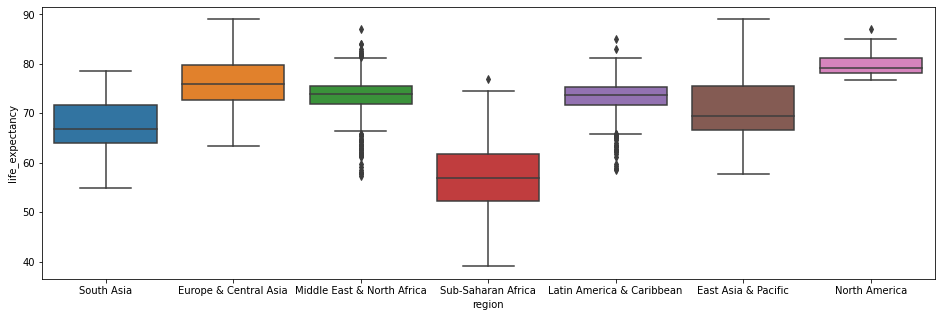

In [20]:
data = pd.concat([df['life_expectancy'], df['region']], axis=1)
f, ax = plt.subplots(figsize=(16, 5))
fig = sns.boxplot(x='region', y="life_expectancy", data=data)

In [21]:
df.head()

,country,region,year,status,life_expectancy,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,...,hiv_aids,gdp,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adlts
0,Afghanistan,South Asia,2000,Developing,54.8,316.0496,0.098245,0.011050,0.01,62.0,...,0.1,114.560000,20.6,0.6,0.338,5.5,27.77190,NaN,NaN,2.3
1,Afghanistan,South Asia,2001,Developing,55.3,307.2416,0.095925,0.010625,0.01,63.0,...,0.1,117.496980,20.4,0.7,0.340,5.9,27.79726,NaN,NaN,2.4
2,Afghanistan,South Asia,2002,Developing,56.2,292.3430,0.093330,0.010130,0.01,64.0,...,0.1,187.845950,20.2,0.8,0.341,6.2,29.90076,870.0,9.44339,2.6
3,Afghanistan,South Asia,2003,Developing,56.7,286.4569,0.090470,0.009655,0.01,65.0,...,0.1,198.728544,20.0,0.9,0.373,6.5,32.00507,920.0,8.94126,2.7
4,Afghanistan,South Asia,2004,Developing,57.0,281.8943,0.087595,0.009210,0.02,67.0,...,0.1,219.141353,19.8,1.0,0.381,6.8,34.12623,920.0,9.80847,2.9


[Here’s All you Need to Know About Encoding Categorical Data (with Python code)](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)

In [22]:
# DECISION TREE AND RANDOM FOREST #### DONT DELETE 

# encoder= ce.OrdinalEncoder(cols=['region'], return_df=True, mapping=[{'col':'region', 'mapping':{'North America': 6, 'Europe & Central Asia': 5, 'Middle East & North Africa': 4, 'Latin America & Caribbean': 3, 'East Asia & Pacific': 2, 'South Asia': 1, 'Sub-Saharan Africa': 0}}])
# df = encoder.fit_transform(df)

# label_encoder = preprocessing.LabelEncoder()
# df['country']= label_encoder.fit_transform(df['country'])
# encoder= ce.OrdinalEncoder(cols=['status'], return_df=True, mapping=[{'col':'status', 'mapping':{'Developing': 0, 'Developed': 1}}])
# df = encoder.fit_transform(df)
# df.head()

In [23]:
df = pd.get_dummies(df, columns = ['region', 'status'], drop_first=True)
df

,country,year,life_expectancy,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,bmi,polio,...,national_income_capita,health_expenditure%_gdp,obesity_adlts,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,status_Developing
0,Afghanistan,2000,54.8,316.0496,0.098245,0.011050,0.01,62.0,21.7,24.0,...,NaN,NaN,2.3,0,0,0,0,1,0,1
1,Afghanistan,2001,55.3,307.2416,0.095925,0.010625,0.01,63.0,21.8,35.0,...,NaN,NaN,2.4,0,0,0,0,1,0,1
2,Afghanistan,2002,56.2,292.3430,0.093330,0.010130,0.01,64.0,21.9,36.0,...,870.0,9.44339,2.6,0,0,0,0,1,0,1
3,Afghanistan,2003,56.7,286.4569,0.090470,0.009655,0.01,65.0,22.0,41.0,...,920.0,8.94126,2.7,0,0,0,0,1,0,1
4,Afghanistan,2004,57.0,281.8943,0.087595,0.009210,0.02,67.0,22.1,5.0,...,920.0,9.80847,2.9,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2011,54.9,440.1428,0.056580,0.007730,6.00,94.0,23.7,93.0,...,1490.0,7.69413,14.1,0,0,0,0,0,1,1
2934,Zimbabwe,2012,56.6,406.6551,0.051930,0.006710,6.09,97.0,23.7,95.0,...,1570.0,6.47979,14.3,0,0,0,0,0,1,1
2935,Zimbabwe,2013,58.0,383.0344,0.048545,0.005885,6.39,95.0,23.7,95.0,...,1560.0,6.55211,14.6,0,0,0,0,0,1,1
2936,Zimbabwe,2014,59.2,358.4411,0.044875,0.005250,6.50,91.0,23.8,92.0,...,NaN,7.86977,14.9,0,0,0,0,0,1,1


###### Trying Linear Regression for missing values

In [24]:
from sklearn.experimental import enable_iterative_imputer

In [25]:
from sklearn.impute import IterativeImputer

In [26]:
df.head()

,country,year,life_expectancy,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,bmi,polio,...,national_income_capita,health_expenditure%_gdp,obesity_adlts,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,status_Developing
0,Afghanistan,2000,54.8,316.0496,0.098245,0.011050,0.01,62.0,21.7,24.0,...,NaN,NaN,2.3,0,0,0,0,1,0,1
1,Afghanistan,2001,55.3,307.2416,0.095925,0.010625,0.01,63.0,21.8,35.0,...,NaN,NaN,2.4,0,0,0,0,1,0,1
2,Afghanistan,2002,56.2,292.3430,0.093330,0.010130,0.01,64.0,21.9,36.0,...,870.0,9.44339,2.6,0,0,0,0,1,0,1
3,Afghanistan,2003,56.7,286.4569,0.090470,0.009655,0.01,65.0,22.0,41.0,...,920.0,8.94126,2.7,0,0,0,0,1,0,1
4,Afghanistan,2004,57.0,281.8943,0.087595,0.009210,0.02,67.0,22.1,5.0,...,920.0,9.80847,2.9,0,0,0,0,1,0,1


In [27]:
df.columns

Index(['country', 'year', 'life_expectancy', 'adult_mortality',
       'infant_mortality', '1-4_mortality', 'alcohol', 'hep_b', 'bmi', 'polio',
       'health_gov_expendt%', 'dtp3', 'hiv_aids', 'gdp', '5_19thinness',
       '5_19obesity', 'hdi', 'schooling', 'drinking_water',
       'national_income_capita', 'health_expenditure%_gdp', 'obesity_adlts',
       'region_Europe & Central Asia', 'region_Latin America & Caribbean',
       'region_Middle East & North Africa', 'region_North America',
       'region_South Asia', 'region_Sub-Saharan Africa', 'status_Developing'],
      dtype='object')

In [28]:
X = df.copy()

In [29]:
X = X.drop(['life_expectancy', 'country'], axis = 1)
variables = X.columns
variables

Index(['year', 'adult_mortality', 'infant_mortality', '1-4_mortality',
       'alcohol', 'hep_b', 'bmi', 'polio', 'health_gov_expendt%', 'dtp3',
       'hiv_aids', 'gdp', '5_19thinness', '5_19obesity', 'hdi', 'schooling',
       'drinking_water', 'national_income_capita', 'health_expenditure%_gdp',
       'obesity_adlts', 'region_Europe & Central Asia',
       'region_Latin America & Caribbean', 'region_Middle East & North Africa',
       'region_North America', 'region_South Asia',
       'region_Sub-Saharan Africa', 'status_Developing'],
      dtype='object')

In [34]:
lr =  LinearRegression()
imp = IterativeImputer(estimator = lr, verbose = 2, random_state = 0, max_iter = 100, tol = 1e-5, imputation_order = 'random')

In [35]:
imputed_data = imp.fit_transform(X)

[IterativeImputer] Completing matrix with shape (2928, 27)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.12
[IterativeImputer] Change: 70775.99618874863, scaled tolerance: 1.2386000000000001 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.21
[IterativeImputer] Change: 13753.10715761747, scaled tolerance: 1.2386000000000001 
[IterativeImputer] Ending imputation round 3/100, elapsed time 0.31
[IterativeImputer] Change: 5703.699212798445, scaled tolerance: 1.2386000000000001 
[IterativeImputer] Ending imputation round 4/100, elapsed time 0.40
[IterativeImputer] Change: 2632.0058743635695, scaled tolerance: 1.2386000000000001 
[IterativeImputer] Ending imputation round 5/100, elapsed time 0.51
[IterativeImputer] Change: 2027.4691547215912, scaled tolerance: 1.2386000000000001 
[IterativeImputer] Ending imputation round 6/100, elapsed time 0.59
[IterativeImputer] Change: 1972.5926641829367, scaled tolerance: 1.2386000000000001 
[IterativeImputer] Ending 

[IterativeImputer] Change: 3.0795107034709055, scaled tolerance: 1.2386000000000001 
[IterativeImputer] Ending imputation round 56/100, elapsed time 5.73
[IterativeImputer] Change: 8.462644848488818, scaled tolerance: 1.2386000000000001 
[IterativeImputer] Ending imputation round 57/100, elapsed time 5.82
[IterativeImputer] Change: 3.0010551825929355, scaled tolerance: 1.2386000000000001 
[IterativeImputer] Ending imputation round 58/100, elapsed time 5.94
[IterativeImputer] Change: 8.321930254569072, scaled tolerance: 1.2386000000000001 
[IterativeImputer] Ending imputation round 59/100, elapsed time 6.08
[IterativeImputer] Change: 0.6803577034865114, scaled tolerance: 1.2386000000000001 
[IterativeImputer] Early stopping criterion reached.


In [36]:
imputed_dataset = pd.DataFrame(imputed_data, columns = variables)

In [37]:
imputed_dataset.head()

,year,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,bmi,polio,health_gov_expendt%,dtp3,...,national_income_capita,health_expenditure%_gdp,obesity_adlts,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,status_Developing
0,2000.0,316.0496,0.098245,0.011050,0.01,62.0,21.7,24.0,8.20,24.0,...,-6116.469944,5.324302,2.3,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2001.0,307.2416,0.095925,0.010625,0.01,63.0,21.8,35.0,7.80,33.0,...,-5490.544839,5.353053,2.4,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2002.0,292.3430,0.093330,0.010130,0.01,64.0,21.9,36.0,7.76,36.0,...,870.000000,9.443390,2.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2003.0,286.4569,0.090470,0.009655,0.01,65.0,22.0,41.0,8.82,41.0,...,920.000000,8.941260,2.7,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2004.0,281.8943,0.087595,0.009210,0.02,67.0,22.1,5.0,8.79,5.0,...,920.000000,9.808470,2.9,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [38]:
df = df['life_expectancy']
df = df.to_frame()
df.head()

,life_expectancy
0,54.8
1,55.3
2,56.2
3,56.7
4,57.0


In [39]:
df.insert(0, 'sn', range(0, len(df)))

In [40]:
imputed_dataset.insert(0, 'sn', range(0, len(imputed_dataset)))

In [41]:
df = pd.merge(df, imputed_dataset)
df = df.drop('sn', axis = 1)

In [42]:
df.head()

,life_expectancy,year,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,bmi,polio,health_gov_expendt%,...,national_income_capita,health_expenditure%_gdp,obesity_adlts,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,status_Developing
0,54.8,2000.0,316.0496,0.098245,0.011050,0.01,62.0,21.7,24.0,8.20,...,-6116.469944,5.324302,2.3,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,55.3,2001.0,307.2416,0.095925,0.010625,0.01,63.0,21.8,35.0,7.80,...,-5490.544839,5.353053,2.4,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,56.2,2002.0,292.3430,0.093330,0.010130,0.01,64.0,21.9,36.0,7.76,...,870.000000,9.443390,2.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,56.7,2003.0,286.4569,0.090470,0.009655,0.01,65.0,22.0,41.0,8.82,...,920.000000,8.941260,2.7,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,57.0,2004.0,281.8943,0.087595,0.009210,0.02,67.0,22.1,5.0,8.79,...,920.000000,9.808470,2.9,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [43]:
df.to_csv('Filled Data.csv')

Executing shutdown due to inactivity...


2021-08-21 02:27:22,823 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-08-21 02:27:24,942 - INFO     - Executing shutdown...
